<a href="https://colab.research.google.com/github/leonaardoas/State-Farm-Distracted-Driver-Detection/blob/main/State_Farm_Distracted_Driver_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import tensorflow as tf
from tensorflow.keras.layers import AveragePooling2D
from keras.preprocessing import image
import keras.utils as image
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, f1_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras import layers, models
from keras.utils import to_categorical
from collections import Counter
from pandas.core.algorithms import value_counts




In [3]:
folder = pd.read_csv('/content/drive/MyDrive/Artigo - Janaina/driver_imgs_list.csv')
folder

folder.drop(columns=['subject'], inplace=True)
folder

,classname,img
0,c0,img_44733.jpg
1,c0,img_72999.jpg
2,c0,img_25094.jpg
3,c0,img_69092.jpg
4,c0,img_92629.jpg
...,...,...
22419,c9,img_56936.jpg
22420,c9,img_46218.jpg
22421,c9,img_25946.jpg
22422,c9,img_67850.jpg


In [4]:
classes = ['c5', 'c6', 'c7', 'c8', 'c9']
folder = folder[~folder['classname'].isin(classes)]
folder

folder.reset_index(drop=True, inplace=True)
folder


,classname,img
0,c0,img_44733.jpg
1,c0,img_72999.jpg
2,c0,img_25094.jpg
3,c0,img_69092.jpg
4,c0,img_92629.jpg
...,...,...
11740,c4,img_67543.jpg
11741,c4,img_37053.jpg
11742,c4,img_31474.jpg
11743,c4,img_3345.jpg


In [5]:
classes1 = ['c1', 'c2', 'c3', 'c4']
nuvem = []

for index, row in folder.iterrows():
  if row['classname'] in classes1:
    nuvem.append([1,0])
  else:
    nuvem.append([0,0])

print(nuvem)

dt = pd.DataFrame(nuvem, columns=['com celular', 'sem cinto'])
dt

[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0],

,com celular,sem cinto
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
11740,1,0
11741,1,0
11742,1,0
11743,1,0


In [6]:
df = pd.concat([folder, dt], axis=1)
df

,classname,img,com celular,sem cinto
0,c0,img_44733.jpg,0,0
1,c0,img_72999.jpg,0,0
2,c0,img_25094.jpg,0,0
3,c0,img_69092.jpg,0,0
4,c0,img_92629.jpg,0,0
...,...,...,...,...
11740,c4,img_67543.jpg,1,0
11741,c4,img_37053.jpg,1,0
11742,c4,img_31474.jpg,1,0
11743,c4,img_3345.jpg,1,0


# **CONFERIR O Nº DE IMAGENS PRESENTES NO CONJUNTO DE DADOS**

In [ ]:
import os
import fnmatch

# Caminho para a pasta do Google Drive sincronizada localmente
folder_path = '/content/drive/MyDrive/Artigo - Janaina/Dataset'  # Substitua pelo caminho da sua pasta

# Lista de padrões de extensões de arquivos de imagem
image_patterns = ['*.jpg', '*.jpeg', '*.png']

# Função para contar imagens na pasta
def count_images_in_folder(folder_path):
    count = 0
    for root, dirs, files in os.walk(folder_path):
        for pattern in image_patterns:
            for filename in fnmatch.filter(files, pattern):
                count += 1
    return count

# Contar e imprimir o número de imagens
image_count = count_images_in_folder(folder_path)
print(f'Número de imagens na pasta: {image_count}')


Número de imagens na pasta: 11755


# **RETORNAR O NOME DAS IMAGENS DUPLICADAS**

In [ ]:
import os

def get_image_files_with_parentheses(directory):
    """
    Retorna uma lista de nomes de arquivos de imagem que contêm parênteses em seus nomes.
    """
    supported_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')
    image_files_with_parentheses = []

    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(supported_extensions) and ('(' in file or ')' in file):
                image_files_with_parentheses.append(file)

    return image_files_with_parentheses

# Caminho para a pasta do Google Drive no seu sistema de arquivos local
drive_folder = '/content/drive/MyDrive/Artigo - Janaina/Dataset'

# Encontrar arquivos de imagem com parênteses no nome
files_with_parentheses = get_image_files_with_parentheses(drive_folder)

# Listar arquivos encontrados
if files_with_parentheses:
    print("Arquivos de imagem com parênteses no nome:")
    for file in files_with_parentheses:
        print(file)
else:
    print("Nenhuma imagem com parênteses no nome encontrada.")




Arquivos de imagem com parênteses no nome:
img_77498 (1).jpg
img_77558 (1).jpg
img_77136 (1).jpg
img_77140 (1).jpg
img_77590 (1).jpg
img_77490 (1).jpg
img_77315 (1).jpg
img_77169 (1).jpg
img_77252 (1).jpg
img_76704 (1).jpg


# **EXCLUIR IMAGENS DUPLICADAS**

In [ ]:
def delete_image_files_with_parentheses

#Exclui arquivos de imagem que contêm parênteses em seus nomes e retorna a lista de arquivos excluídos.

    supported_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')
    deleted_files = []

    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(supported_extensions) and ('(' in file or ')' in file):
                file_path = os.path.join(root, file)
                os.remove(file_path)
                deleted_files.append(file_path)

    return deleted_files

# Caminho para a pasta do Google Drive no seu sistema de arquivos local
drive_folder = '/content/drive/MyDrive/Artigo - Janaina/Dataset'

# Excluir arquivos de imagem com parênteses no nome
deleted_files = delete_image_files_with_parentheses(drive_folder)

# Listar arquivos excluídos
if deleted_files:
    print("Arquivos de imagem com parênteses no nome foram excluídos:")
    for file in deleted_files:
        print(file)
else:
    print("Nenhuma imagem com parênteses no nome encontrada.")


Arquivos de imagem com parênteses no nome foram excluídos:
/content/drive/MyDrive/Artigo - Janaina/Dataset/img_77498 (1).jpg
/content/drive/MyDrive/Artigo - Janaina/Dataset/img_77558 (1).jpg
/content/drive/MyDrive/Artigo - Janaina/Dataset/img_77136 (1).jpg
/content/drive/MyDrive/Artigo - Janaina/Dataset/img_77140 (1).jpg
/content/drive/MyDrive/Artigo - Janaina/Dataset/img_77590 (1).jpg
/content/drive/MyDrive/Artigo - Janaina/Dataset/img_77490 (1).jpg
/content/drive/MyDrive/Artigo - Janaina/Dataset/img_77315 (1).jpg
/content/drive/MyDrive/Artigo - Janaina/Dataset/img_77169 (1).jpg
/content/drive/MyDrive/Artigo - Janaina/Dataset/img_77252 (1).jpg
/content/drive/MyDrive/Artigo - Janaina/Dataset/img_76704 (1).jpg


# **TRATAMENTO DAS IMAGENS**

In [7]:
image_directory = '/content/drive/MyDrive/Artigo - Janaina/Dataset/' #Acessar o dataset


X_dataset = []
for i in tqdm(range(df[0:500].shape[0])): #a função tqdm cria uma barra de progresso
    pic = image.load_img(image_directory +df['img'][i], target_size=(32, 32, 3)) #Acessar a imagem seguindo a ordem dos dados do dataframe
    pic = image.img_to_array(pic) #transformar em um array
    pic = pic/255.    #normalização
    X_dataset.append(pic)

X = np.array(X_dataset)
y = np.array(df[['com celular','sem cinto']][0:500])


100%|██████████| 500/500 [03:37<00:00,  2.30it/s]


In [8]:
X_train_, X_test, y_train_, y_test = train_test_split(X, y, random_state = 20, test_size=0.2, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_, y_train_, random_state = 20, test_size=0.2)

print("Balanceamento das classes no conjunto de treinamento:")
print(Counter([tuple(np.where(y_train[i])[0]) for i in range(y_train.shape[0])]))

print("Balanceamento das classes no conjunto de teste:")
print(Counter([tuple(np.where(y_test[i])[0]) for i in range(y_test.shape[0])]))

print("Balanceamento das classes no conjunto de validação:")
print(Counter([tuple(np.where(y_val[i])[0]) for i in range(y_val.shape[0])]))

Balanceamento das classes no conjunto de treinamento:
Counter({(0,): 219, (): 101})
Balanceamento das classes no conjunto de teste:
Counter({(0,): 68, (): 32})
Balanceamento das classes no conjunto de validação:
Counter({(0,): 53, (): 27})


# **REDES NEURAIS CONVOLUCIONAIS** RESNET E XCEPTION

In [9]:
EPOCHS = 50

resnet = keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(32, 32, 3),
    pooling='avg',
    classes=2,
    classifier_activation="sigmoid",
)

for layer in resnet.layers:
        layer.trainable = False

model = models.Sequential([resnet,
                          layers.Flatten(),
                          layers.Dense(512, activation='relu'),
                          layers.Dense(2, activation='sigmoid')])

model.summary()
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

checkpoint_path = "best_model.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# criar um callback para salvar o peso do modelo
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only = True,
                                                 verbose=1)

history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_val, y_val), batch_size=64, callbacks=[cp_callback])

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24637826 (93.99 MB)
Trainable params: 1050114 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________
Epoch 1/50
4/5 [=======================>......] - ETA: 0s - loss: 0.4588 - ac

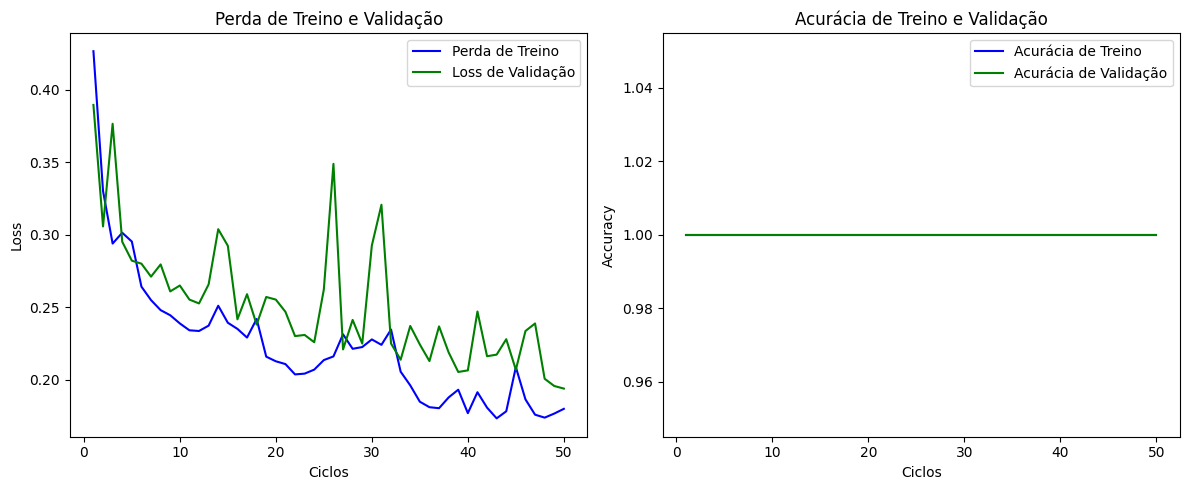

In [14]:
# Extraia métricas de desempenho
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Crie um gráfico para visualizar o desempenho
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Perda de Treino')
plt.plot(epochs, val_loss, 'g', label='Loss de Validação')
plt.title('Perda de Treino e Validação')
plt.xlabel('Ciclos')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b', label='Acurácia de Treino')
plt.plot(epochs, val_acc, 'g', label='Acurácia de Validação')
plt.title('Acurácia de Treino e Validação')
plt.xlabel('Ciclos')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# **PREVISÃO DOS RÓTULOS**
```



In [16]:
pdc = model.predict(X_test)

thresholds = np.arange(0.1, 1.0, 0.01)

best_f1 = 0
best_threshold = 0
y_pred,y_true = pdc, y_test

for threshold in thresholds:
    y_pred_binary = (y_pred > threshold).astype(int)
    f1 = f1_score(y_true, y_pred_binary, average='micro')

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print('Best Threshold:', best_threshold)
print('Best F1-score:', best_f1)

y_binary = (pdc > best_threshold).astype(int)
print(y_binary)
print(len(y_binary),len(y_binary[0]))

4/4 [==============================] - 0s 15ms/step
Best Threshold: 0.5499999999999998
Best F1-score: 0.8976377952755905
[[0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
100 2


# **AVALIANDO A SAÍDA**

In [47]:
# Carregar a imagem
img = '/content/drive/MyDrive/Artigo - Janaina/img teste/teste.jpg'
img = image.load_img(img_path, target_size=(32, 32, 3))
img = image.img_to_array(img)
img = np.expand_dims(img_array, axis=0)
img = img_array/255.

previsao = model.predict(img_array)
print(f"com celular: {previsao[0][0] * 100:.2f}%")
print(f"sem cinto: {previsao[0][1] * 100:.20f}%")

1/1 [==============================] - 0s 40ms/step
com celular: 98.23%
sem cinto: 0.00000000351002421572%


# **AVALIAÇÃO DO MODELO**

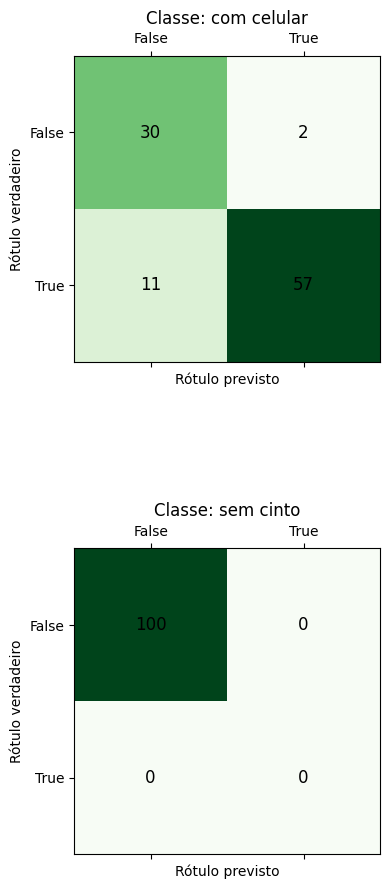

In [23]:
caracteristicas = ['com celular', 'sem cinto']

cm = multilabel_confusion_matrix(y_true, y_binary)

num_classes = cm.shape[0]
fig, axes = plt.subplots(num_classes, figsize=(4, 10))
for i, ax in enumerate(axes):
    ax.matshow(cm[i], cmap=plt.cm.Greens)
    ax.set_title('Classe: '+caracteristicas[i])
    ax.set_xlabel('Rótulo previsto')
    ax.set_ylabel('Rótulo verdadeiro')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['False', 'True'])
    ax.set_yticklabels(['False', 'True'])
    for (j, k), value in np.ndenumerate(cm[i]):
        ax.text(k, j, f'{value}', ha='center', va='center', fontsize=12)


plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import classification_report

classes = ['com celular', 'sem cinto']
print(classification_report(y_test, y_binary,target_names=classes))

              precision    recall  f1-score   support

 com celular       0.97      0.84      0.90        68
   sem cinto       0.00      0.00      0.00         0

   micro avg       0.97      0.84      0.90        68
   macro avg       0.48      0.42      0.45        68
weighted avg       0.97      0.84      0.90        68
 samples avg       0.57      0.57      0.57        68



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.